# 2016 US Election

In [1]:
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_primary = pd.read_csv('data/2016_presidential_election/primary_results.csv', sep=',')
df_counties = pd.read_csv('data/2016_presidential_election/county_facts.csv', sep=',')

## 2016 US Election 데이터셋 분석하기
### df_primary
- state: state where the primary or caucus was held
- state_abbreviation: two letter state abbreviation
- county: county where the results come from
- fips: FIPS county code
- party: Democrat or Republican
- candidate: name of the candidate
- votes: number of votes the candidate received in the corresponding state and county (may be missing)
- fraction_votes: fraction of votes the president received in the corresponding state, county, and primary

### df_counties
- "RHI125214: White alone, percent, 2014
- "RHI225214": Black or African American alone, percent, 2014
- "RHI325214": "American Indian and Alaska Native alone, percent, 2014
- "RHI425214": Asian alone, percent, 2014
- "RHI525214": Native Hawaiian and Other Pacific Islander alone, percent, 2014
- "RHI625214": Two or More Races, percent, 2014
- "RHI725214": Hispanic or Latino, percent, 2014
- "RHI825214": White alone, not Hispanic or Latino, percent, 2014

(others omission)
* Reference: https://www.kaggle.com/benhamner/2016-us-election

In [3]:
df_primary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 8 columns):
state                 13212 non-null object
state_abbreviation    13212 non-null object
county                13212 non-null object
fips                  13212 non-null int64
party                 13212 non-null object
candidate             13212 non-null object
votes                 13212 non-null int64
fraction_votes        13212 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 825.8+ KB


In [4]:
df_primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [5]:
seri_pr_candidate_to_votes = df_primary.groupby("candidate")["votes"].sum().sort_values()

In [6]:
seri_pr_candidate_to_votes.head()

candidate
 Uncommitted         43
 No Preference      313
Martin O'Malley     747
Rick Santorum      1773
Mike Huckabee      3300
Name: votes, dtype: int64

<IPython.core.display.Javascript object>


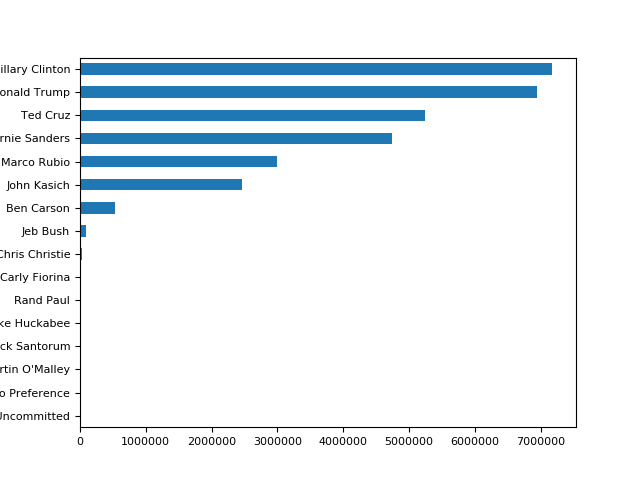

In [7]:
gp_pr_cadidate = seri_pr_candidate_to_votes.plot(kind="barh", fontsize=8)

- Calculating the percentage of votes in each state, each political party

In [8]:
seri_state_party_to_votes = df_primary.groupby(["state", "party"])["votes"].sum()

In [10]:
seri_state_party_to_votes.head()

state     party     
Alabama   Democrat      381810
          Republican    805814
Arizona   Democrat      399097
          Republican    435103
Arkansas  Democrat      207182
Name: votes, dtype: int64

In [11]:
seri_state_to_votes = df_primary.groupby("state")["votes"].sum()

In [13]:
seri_state_party_to_votes.head()

state     party     
Alabama   Democrat      381810
          Republican    805814
Arizona   Democrat      399097
          Republican    435103
Arkansas  Democrat      207182
Name: votes, dtype: int64

In [14]:
state_party_to_vote_pcts = seri_state_party_to_votes / seri_state_to_votes

In [16]:
state_party_to_vote_pcts.head()

state     party     
Alabama   Democrat      0.321491
          Republican    0.678509
Arizona   Democrat      0.478419
          Republican    0.521581
Arkansas  Democrat      0.343990
Name: votes, dtype: float64

In [16]:
state_party_to_vote_pcts.head()

state     party     
Alabama   Democrat      0.321491
          Republican    0.678509
Arizona   Democrat      0.478419
          Republican    0.521581
Arkansas  Democrat      0.343990
Name: votes, dtype: float64

<IPython.core.display.Javascript object>


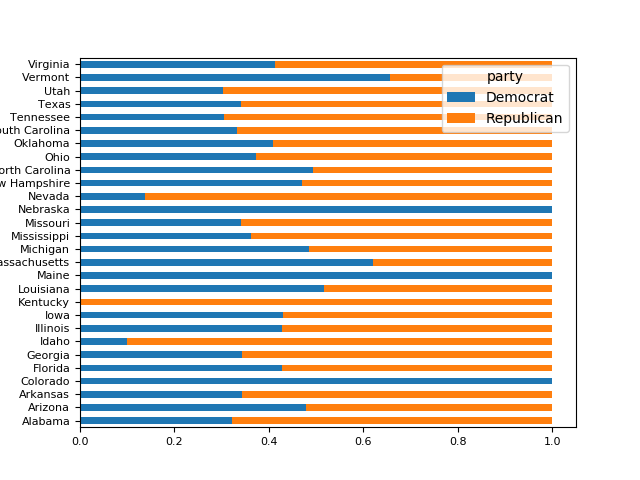

In [11]:
state_party_to_vote_pcts.unstack().plot(kind="barh", stacked=True, fontsize=8)

- 백인 유권자의 비율이 높을수록 공화당후보가 당선될확률이 높다??? thesis.

- 각 후보가 당선된 county의 평균 백인 유권자 비율 조사하기

In [15]:
df_primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [17]:
func = lambda df_agg: df_agg.sort_values("votes", ascending=False).iloc[0]
df_winners = df_primary.groupby("fips").agg(func)
type(df_winners)

pandas.core.frame.DataFrame

In [18]:
df_winners.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445
1003,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469
1005,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906
1007,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494
1009,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487


In [24]:
df_counties['RHI825214'].head()

0    62.1
1    66.2
2    75.6
3    83.0
4    46.6
Name: RHI825214, dtype: float64

In [25]:
df_counties[["fips", "RHI825214"]].head()

,fips,RHI825214
0,0,62.1
1,1000,66.2
2,1001,75.6
3,1003,83.0
4,1005,46.6


In [26]:
df_winners.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445
1003,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469
1005,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906
1007,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494
1009,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487


In [28]:
# joinning two dataframe.
df_winners_county_races = pd.merge(df_winners, df_counties[["fips", "RHI825214"]], 
                                left_index=True, right_on="fips", how="left")

In [30]:
df_winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,RHI825214
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009,87.8


In [33]:
# change columns name
df_winners_county_races = df_winners_county_races.rename(columns={'RHI825214':'white_pcts'})

In [34]:
df_winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,white_pcts
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009,87.8


In [38]:
seri_winners_county_white_pcts = df_winners_county_races.groupby(["party", "candidate"])["white_pcts"].mean()

In [39]:
type(seri_winners_county_white_pcts)

pandas.core.series.Series

In [40]:
seri_winners_county_white_pcts

party       candidate      
Democrat    Bernie Sanders     81.944030
            Hillary Clinton    56.856920
Republican  Ben Carson         81.100000
            Donald Trump       83.235638
            John Kasich        89.226415
            Marco Rubio        78.883333
            Ted Cruz           74.164665
Name: white_pcts, dtype: float64

<IPython.core.display.Javascript object>


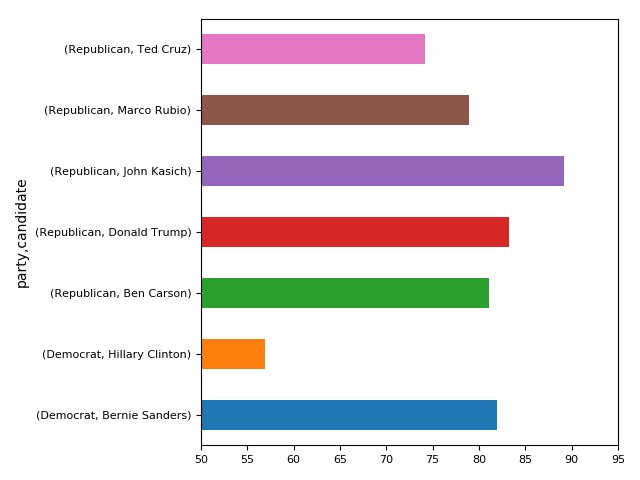

In [43]:
gp_winners_county_white = seri_winners_county_white_pcts.plot(kind="barh", fontsize=8)

In [45]:
gp_winners_county_white.set_xlim([50, 95])
plt.tight_layout()

# Pivot table
- '피벗 테이블(pivot table)'을 사용하면, 데이터셋에 대하여 그룹화에 기반한 통계량을 계산하는 작업이 더 간편해집니다.
- 피벗 테이블은 df.pivot_table() 함수를 사용하여 생성합니다. values 인자로는 통계량을 계산할 열을, index와 columns 인자는 각각 그 값을 피벗 테이블의 인덱스와 컬럼으로 사용할 열을, aggfunc 인자로는 적용할 통계 함수를 명시합니다.



In [53]:
df_total_votes = df_primary.pivot_table(values="votes", index="state", columns="candidate", aggfunc="sum", fill_value=0)

In [55]:
df_total_votes

candidate,No Preference,Uncommitted,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,John Kasich,Marco Rubio,Martin O'Malley,Mike Huckabee,Rand Paul,Rick Santorum,Ted Cruz
state,,,,,,,,,,,,,,,,
Alabama,0,0,84139,74987,0,0,356892,306823,0,37127,154379,0,0,0,0,173277
Arizona,0,0,0,163400,0,0,249916,235697,0,53040,0,0,0,0,0,132147
Arkansas,0,0,23105,64514,0,0,132546,142668,0,15079,100999,0,0,0,0,123379
Colorado,0,0,0,71928,0,0,0,49256,0,0,0,0,0,0,0,0
Florida,0,0,0,547051,0,0,1015451,1064566,0,150167,607491,0,0,0,0,383189
Georgia,0,0,78731,181760,0,0,490566,460660,0,66740,297748,0,0,0,0,298304
Idaho,0,0,0,18550,0,0,60810,5017,0,16251,34976,0,0,0,0,99447
Illinois,0,0,0,354344,0,0,350991,304632,0,153761,72233,0,0,0,0,304903
Iowa,0,43,17173,69311,3475,3278,45163,69581,5221,3466,42883,747,3300,8460,1773,51316


- 예를 들어 total_votes라는 피벗 테이블은 "state"와 "candidate" 열의 값을 그룹화 기준으로 하여, "votes" 열의 값의 합계를 산출한 결과입니다. 이 때 fill_value=0 인자를 넣어주면, NaN이 나올 부분이 0으로 대체됩니다. 피벗 테이블도 DataFrame 형태를 지닙니다.
- 혹은 다음과 같이 하면 "state_abbreviation"과 "party" 열의 값을 그룹화 기준으로 하여, "fraction_votes" 열의 값의 평균을 나타내는 피벗 테이블을 만들 수 있습니다.

In [56]:
df_primary.pivot_table(values="fraction_votes", index="state_abbreviation", columns="party", aggfunc="mean")

party,Democrat,Republican
state_abbreviation,,
AL,0.476823,0.195277
AR,0.464784,0.191924
AZ,0.478433,0.283867
CO,0.481016,NaN
FL,0.469349,0.242413
GA,0.493525,0.196939
IA,0.250003,0.090857
ID,0.494733,0.240773
IL,0.489632,0.242013
